## Import Dataset

In [1]:
# import dependencies
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# the dataset can be found here: https://www.kaggle.com/imrandude/twitter-sentiment-analysis

# read in the training dataset as pandas dataframe
df = pd.read_csv('data/train.csv', encoding = "ISO-8859-1")

In [4]:
# confirm dataset 
df.head(5)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,5,0,i think mi bf is cheating on me!!! T_T


In [5]:
# drop ItemID column - provides no predictive value
column = ['ItemID']
df.drop(column, inplace=True, axis=1)

In [6]:
# check rows and columns
df.shape

(99989, 2)

In [7]:
# how many positive (1) and negative (0) classified tweets?
df.Sentiment.value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

## Pre-processing Tweets

In [8]:
# cite here: https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis

# remove punctuation
def clean_punctuation(tweet):
    tweet = "".join([char for char in tweet if char not in string.punctuation])
    tweet = re.sub('[0-9]+', '', tweet)
    return tweet
df['TweetCleaned'] = df['SentimentText'].apply(lambda x: clean_punctuation(x))
df.head(5)

,Sentiment,SentimentText,TweetCleaned
0,0,is so sad for my APL friend.............,is so sad for my APL friend
1,0,I missed the New Moon trailer...,I missed the New Moon trailer
2,1,omg its already 7:30 :O,omg its already O
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,Omgaga Im sooo im gunna CRy Ive been at this dentist since I was suposed just get a crown put on mins
4,0,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me TT


In [9]:
# tokenize tweets
def tokenization(tweet):
    tweet = word_tokenize(tweet)
    return tweet
df['TweetTokens'] = df['TweetCleaned'].apply(lambda x: tokenization(x.lower()))
df.head()

,Sentiment,SentimentText,TweetCleaned,TweetTokens
0,0,is so sad for my APL friend.............,is so sad for my APL friend,"[is, so, sad, for, my, apl, friend]"
1,0,I missed the New Moon trailer...,I missed the New Moon trailer,"[i, missed, the, new, moon, trailer]"
2,1,omg its already 7:30 :O,omg its already O,"[omg, its, already, o]"
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,Omgaga Im sooo im gunna CRy Ive been at this dentist since I was suposed just get a crown put on mins,"[omgaga, im, sooo, im, gunna, cry, ive, been, at, this, dentist, since, i, was, suposed, just, get, a, crown, put, on, mins]"
4,0,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me TT,"[i, think, mi, bf, is, cheating, on, me, tt]"


In [10]:
# remove stopwords
stopwords = stopwords.words('english')

def remove_stopwords(tweet):
    tweet = [word for word in tweet if word not in stopwords]
    return tweet

df['Tweets_Stop'] = df['TweetTokens'].apply(lambda x: remove_stopwords(x))
df.head(5)

,Sentiment,SentimentText,TweetCleaned,TweetTokens,Tweets_Stop
0,0,is so sad for my APL friend.............,is so sad for my APL friend,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]"
1,0,I missed the New Moon trailer...,I missed the New Moon trailer,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]"
2,1,omg its already 7:30 :O,omg its already O,"[omg, its, already, o]","[omg, already]"
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,Omgaga Im sooo im gunna CRy Ive been at this dentist since I was suposed just get a crown put on mins,"[omgaga, im, sooo, im, gunna, cry, ive, been, at, this, dentist, since, i, was, suposed, just, get, a, crown, put, on, mins]","[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, suposed, get, crown, put, mins]"
4,0,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me TT,"[i, think, mi, bf, is, cheating, on, me, tt]","[think, mi, bf, cheating, tt]"


In [11]:
# implement stemming
porterStemmer = nltk.PorterStemmer()
def stem(tweet):
    tweet = [porterStemmer.stem(word) for word in tweet]
    return tweet

df['Tweets_Stemmed'] = df['Tweets_Stop'].apply(lambda x: stem(x))
df.head()

,Sentiment,SentimentText,TweetCleaned,TweetTokens,Tweets_Stop,Tweets_Stemmed
0,0,is so sad for my APL friend.............,is so sad for my APL friend,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]","[sad, apl, friend]"
1,0,I missed the New Moon trailer...,I missed the New Moon trailer,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]","[miss, new, moon, trailer]"
2,1,omg its already 7:30 :O,omg its already O,"[omg, its, already, o]","[omg, already]","[omg, alreadi]"
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,Omgaga Im sooo im gunna CRy Ive been at this dentist since I was suposed just get a crown put on mins,"[omgaga, im, sooo, im, gunna, cry, ive, been, at, this, dentist, since, i, was, suposed, just, get, a, crown, put, on, mins]","[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, suposed, get, crown, put, mins]","[omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, supos, get, crown, put, min]"
4,0,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me TT,"[i, think, mi, bf, is, cheating, on, me, tt]","[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]"


In [12]:
#create new Tweet column which will store the cleaned tweets
df['Tweet'] = df['Tweets_Stemmed']
df.head()

,Sentiment,SentimentText,TweetCleaned,TweetTokens,Tweets_Stop,Tweets_Stemmed,Tweet
0,0,is so sad for my APL friend.............,is so sad for my APL friend,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]"
1,0,I missed the New Moon trailer...,I missed the New Moon trailer,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]","[miss, new, moon, trailer]","[miss, new, moon, trailer]"
2,1,omg its already 7:30 :O,omg its already O,"[omg, its, already, o]","[omg, already]","[omg, alreadi]","[omg, alreadi]"
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,Omgaga Im sooo im gunna CRy Ive been at this dentist since I was suposed just get a crown put on mins,"[omgaga, im, sooo, im, gunna, cry, ive, been, at, this, dentist, since, i, was, suposed, just, get, a, crown, put, on, mins]","[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, suposed, get, crown, put, mins]","[omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, supos, get, crown, put, min]","[omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, supos, get, crown, put, min]"
4,0,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me TT,"[i, think, mi, bf, is, cheating, on, me, tt]","[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheat, tt]"


In [13]:
# clean the updated dataframe by dropping the columns showing the pre-processing steps
columns = ['SentimentText', 'TweetCleaned', 'TweetTokens','Tweets_Stop','Tweets_Stemmed']
df.drop(columns, inplace=True, axis=1)
df.head()

,Sentiment,Tweet
0,0,"[sad, apl, friend]"
1,0,"[miss, new, moon, trailer]"
2,1,"[omg, alreadi]"
3,0,"[omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, supos, get, crown, put, min]"
4,0,"[think, mi, bf, cheat, tt]"


## Visualize Neg and Pos Tweets

In [14]:
# create df for negative sentiment tweets
is_neg = df['Sentiment']==0
df_neg = df[is_neg]
df_neg.shape

(43532, 2)

In [15]:
# create df for positive sentiment tweets
is_pos = df['Sentiment']==1
df_pos = df[is_pos]
df_pos.shape

(56457, 2)

In [16]:
#create list of tokens for visualization
neg_tokens = df_neg['Tweet'].tolist()
neg_tokens = [item for sublist in neg_tokens for item in sublist]

pos_tokens = df_pos['Tweet'].tolist()
pos_tokens = [item for sublist in pos_tokens for item in sublist]

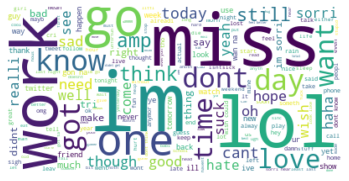

In [17]:
#https://www.mikulskibartosz.name/word-cloud-from-a-pandas-data-frame/

# create a wordcloud for the negative tweets
words = neg_tokens # assign words for the word cloud
wc = WordCloud(background_color = 'white',
               stopwords=STOPWORDS).generate(', '.join(words))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

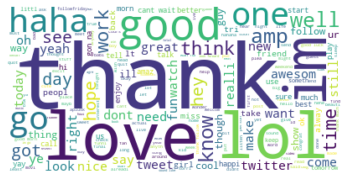

In [18]:
# create a wordcloud for the positive tweets
words = pos_tokens # assign words for the word cloud
wc = WordCloud(background_color = 'white',
               stopwords=STOPWORDS).generate(', '.join(words))   
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Additional Pre-processing Before Training Model

In [19]:
# get the length of each tweet

# create an empty list to store the len of tokens
len_tokens = []
for i in range(len(df['Tweet'])):
    len_tokens.append(len(df['Tweet'][i]))

df['num_words'] = len_tokens
df.head()

,Sentiment,Tweet,num_words
0,0,"[sad, apl, friend]",3
1,0,"[miss, new, moon, trailer]",4
2,1,"[omg, alreadi]",2
3,0,"[omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, supos, get, crown, put, min]",14
4,0,"[think, mi, bf, cheat, tt]",5


In [20]:
# convert column of lists to string
df['Tweet'] = [','.join(map(str, l)) for l in df['Tweet']]
df.head()

,Sentiment,Tweet,num_words
0,0,"sad,apl,friend",3
1,0,"miss,new,moon,trailer",4
2,1,"omg,alreadi",2
3,0,"omgaga,im,sooo,im,gunna,cri,ive,dentist,sinc,supos,get,crown,put,min",14
4,0,"think,mi,bf,cheat,tt",5


In [21]:
# build the vectorizer
vect = TfidfVectorizer(max_features = 200, ngram_range=(1,2)).fit(df.Tweet)

# create matrix from the vectorizer
V = vect.transform(df.Tweet)

# create the transformed df
transformed_df = pd.DataFrame(V.toarray(), columns=vect.get_feature_names())

In [22]:
# test with bi-gram and tri-grams

# build the vectorizer
#vect = TfidfVectorizer(max_features = 200, ngram_range=(2,3)).fit(df.Tweet)

# create matrix from the vectorizer
#V = vect.transform(df.Tweet)

# create the transformed df
#transformed_df = pd.DataFrame(V.toarray(), columns=vect.get_feature_names())

# this method produced accuracy that was 10% lower than using unigrams and bigrams so it will not be used

In [23]:
transformed_df.head()

,actual,alreadi,also,alway,amaz,amp,anoth,anyth,around,away,awesom,aww,back,bad,bed,best,better,big,bit,call,cant,cant wait,check,come,cool,could,day,didnt,doesnt,done,dont,dont know,end,enjoy,even,ever,everyon,excit,feel,find,first,follow,followfriday,friend,fun,funni,game,get,girl,give,glad,go,gon,gon na,good,got,great,guess,guy,haha,hahaha,happen,happi,hate,havent,he,head,hear,help,hey,hi,home,hope,hour,id,ill,im,im sorri,isnt,ive,keep,know,last,late,least,leav,let,life,like,littl,live,lol,long,look,lost,lot,love,lt,luck,made,make,man,mani,mayb,mean,might,mine,miss,morn,movi,much,na,need,never,new,next,nice,night,noth,oh,ok,old,omg,one,peopl,phone,pic,play,pleas,post,pretti,put,rain,read,realli,right,sad,said,saw,say,school,see,seem,send,show,sleep,someon,someth,song,soon,sorri,sound,start,still,stuff,suck,sure,take,talk,tell,thank,that,thing,think,though,thought,time,today,tomorrow,tonight,tri,tweet,twitter,ur,us,use,wait,wan,wan na,want,watch,way,week,weekend,welcom,well,went,what,wish,wont,work,would,wow,ya,yay,ye,yeah,year,yet,your
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.724276,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.689511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666198,0.0,0.0,0.0,0.0,0.0,0.0,0.745775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.692493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.721424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.343236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.597597,0.0,0.0,0.469659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [24]:
#combine the transformed dataframe along with the original to bring in the sentiment and n_words 
d = df.join(transformed_df)
d.head()

,Sentiment,Tweet,num_words,actual,alreadi,also,alway,amaz,amp,anoth,anyth,around,away,awesom,aww,back,bad,bed,best,better,big,bit,call,cant,cant wait,check,come,cool,could,day,didnt,doesnt,done,dont,dont know,end,enjoy,even,ever,everyon,excit,feel,find,first,follow,followfriday,friend,fun,funni,game,get,girl,give,glad,go,gon,gon na,good,got,great,guess,guy,haha,hahaha,happen,happi,hate,havent,he,head,hear,help,hey,hi,home,hope,hour,id,ill,im,im sorri,isnt,ive,keep,know,last,late,least,leav,let,life,like,littl,live,lol,long,look,lost,lot,love,lt,luck,made,make,man,mani,mayb,mean,might,mine,miss,morn,movi,much,na,need,never,new,next,nice,night,noth,oh,ok,old,omg,one,peopl,phone,pic,play,pleas,post,pretti,put,rain,read,realli,right,sad,said,saw,say,school,see,seem,send,show,sleep,someon,someth,song,soon,sorri,sound,start,still,stuff,suck,sure,take,talk,tell,thank,that,thing,think,though,thought,time,today,tomorrow,tonight,tri,tweet,twitter,ur,us,use,wait,wan,wan na,want,watch,way,week,weekend,welcom,well,went,what,wish,wont,work,would,wow,ya,yay,ye,yeah,year,yet,your
0,0,"sad,apl,friend",3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.724276,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.689511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,"miss,new,moon,trailer",4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666198,0.0,0.0,0.0,0.0,0.0,0.0,0.745775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,"omg,alreadi",2,0.0,0.692493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.721424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,"omgaga,im,sooo,im,gunna,cri,ive,dentist,sinc,supos,get,crown,put,min",14,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.343236,0.0,0.0,0.0

## Sentiment Analysis with TextBlob

In [25]:
pd.set_option('display.max_columns', None)

In [26]:
# because TextBlob sentiment analysis is yielding poor results on, the original dataset will be tested without pre-processing
# read in dataset as pandas dataframe
og_df = pd.read_csv('data/train.csv', encoding = "ISO-8859-1")
og_df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,5,0,i think mi bf is cheating on me!!! T_T


In [27]:
def textBlobSentiment(tweet):
    return TextBlob(tweet).sentiment.polarity
    
og_df['TextBlobSentiment'] = og_df.SentimentText.apply(textBlobSentiment)
og_df.head(5)

,ItemID,Sentiment,SentimentText,TextBlobSentiment
0,1,0,is so sad for my APL friend.............,-0.500000
1,2,0,I missed the New Moon trailer...,0.136364
2,3,1,omg its already 7:30 :O,0.050000
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,0.000000
4,5,0,i think mi bf is cheating on me!!! T_T,0.000000


In [28]:
# create a new column with TextBlob sentiment predictions based on polarity
conditions = [
    (og_df['TextBlobSentiment'] > 0),
    (og_df['TextBlobSentiment'] < 0),
    (og_df['TextBlobSentiment'] == 0)]
choices = [1,0,np.NaN]

og_df['Prediction'] = np.select(conditions, choices, default=np.NaN)
og_df.head()

,ItemID,Sentiment,SentimentText,TextBlobSentiment,Prediction
0,1,0,is so sad for my APL friend.............,-0.500000,0.0
1,2,0,I missed the New Moon trailer...,0.136364,1.0
2,3,1,omg its already 7:30 :O,0.050000,1.0
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,0.000000,NaN
4,5,0,i think mi bf is cheating on me!!! T_T,0.000000,NaN


In [29]:
og_df.Prediction.value_counts()

1.0    47163
0.0    17946
Name: Prediction, dtype: int64

In [30]:
text_blob_nulls = og_df.Prediction.isna().sum()
text_blob_nulls

34880

In [31]:
# drop NaNs
og_df = og_df[og_df['Prediction'].notnull()]
og_df.head()

,ItemID,Sentiment,SentimentText,TextBlobSentiment,Prediction
0,1,0,is so sad for my APL friend.............,-0.500000,0.0
1,2,0,I missed the New Moon trailer...,0.136364,1.0
2,3,1,omg its already 7:30 :O,0.050000,1.0
5,6,0,or i just worry too much?,0.200000,1.0
10,11,0,I must think about positive..,0.227273,1.0


In [32]:
# convert text blob predictions to int from float
pd.options.mode.chained_assignment = None
og_df['Predictions'] = og_df['Prediction'].astype(np.int64)
og_df.head()

,ItemID,Sentiment,SentimentText,TextBlobSentiment,Prediction,Predictions
0,1,0,is so sad for my APL friend.............,-0.500000,0.0,0
1,2,0,I missed the New Moon trailer...,0.136364,1.0,1
2,3,1,omg its already 7:30 :O,0.050000,1.0,1
5,6,0,or i just worry too much?,0.200000,1.0,1
10,11,0,I must think about positive..,0.227273,1.0,1


In [33]:
# see if predictions match sentiment
# print the accuracy
print('Accuracy of TextBlob = ', accuracy_score(og_df['Sentiment'], og_df['Predictions']))

Accuracy of TextBlob =  0.694466202829102


## Build the Training Model

In [34]:
# drop the tweet column as it is no longer needed
d = d.drop('Tweet',axis=1)
d.head()

,Sentiment,num_words,actual,alreadi,also,alway,amaz,amp,anoth,anyth,around,away,awesom,aww,back,bad,bed,best,better,big,bit,call,cant,cant wait,check,come,cool,could,day,didnt,doesnt,done,dont,dont know,end,enjoy,even,ever,everyon,excit,feel,find,first,follow,followfriday,friend,fun,funni,game,get,girl,give,glad,go,gon,gon na,good,got,great,guess,guy,haha,hahaha,happen,happi,hate,havent,he,head,hear,help,hey,hi,home,hope,hour,id,ill,im,im sorri,isnt,ive,keep,know,last,late,least,leav,let,life,like,littl,live,lol,long,look,lost,lot,love,lt,luck,made,make,man,mani,mayb,mean,might,mine,miss,morn,movi,much,na,need,never,new,next,nice,night,noth,oh,ok,old,omg,one,peopl,phone,pic,play,pleas,post,pretti,put,rain,read,realli,right,sad,said,saw,say,school,see,seem,send,show,sleep,someon,someth,song,soon,sorri,sound,start,still,stuff,suck,sure,take,talk,tell,thank,that,thing,think,though,thought,time,today,tomorrow,tonight,tri,tweet,twitter,ur,us,use,wait,wan,wan na,want,watch,way,week,weekend,welcom,well,went,what,wish,wont,work,would,wow,ya,yay,ye,yeah,year,yet,your
0,0,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.724276,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.689511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666198,0.0,0.0,0.0,0.0,0.0,0.0,0.745775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,0.0,0.692493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.721424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,14,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.343236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.597597,0.0,0.0,0.469659,0.0,0

In [35]:
# build the logistic regression classifier

# set the variables, y is the field being predicted, X is the fields used to make the prediciton
y = d.Sentiment
X = d.drop('Sentiment', axis=1)

# split the datea for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

# train the logistic regression model
log_reg = LogisticRegression(max_iter=4000).fit(X_train, y_train)

# predict the sentiment
y_pred = log_reg.predict(X_test)

# print the accuracy
print('Accuracy = ', accuracy_score(y_test, y_pred))

# print the confusion matrix
print(confusion_matrix(y_test, y_pred)/len(y_test))

# note - this the current best model and it just about the same as TextBlob but better if you consider that this predicted on all the tweets compared to TextBlob which could not comprehend roughly a third of the tweets

Accuracy =  0.6920692069206921
[[0.23532353 0.20395373]
 [0.10397706 0.45674567]]


In [36]:
# try the model without the n_words column

# set the variables, y is the field being predicted, X is the fields used to make the prediciton
y = d.Sentiment
X = d.drop('Sentiment', axis=1)
X = X.drop('num_words', axis=1)

# split the datea for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

# train the logistic regression model
log_reg = LogisticRegression(max_iter=4000).fit(X_train, y_train)

# predict the sentiment
y_pred = log_reg.predict(X_test)

# print the accuracy
print('Accuracy = ', accuracy_score(y_test, y_pred))

# print the confusion matrix
print(confusion_matrix(y_test, y_pred)/len(y_test))

# note: below we see the accuracy dropped minimally, therefore this is not the optimal model

Accuracy =  0.6918691869186918
[[0.2350235  0.20425376]
 [0.10387705 0.45684568]]


In [37]:
# implement normalization to test if accuracy improves
# build the logistic regression classifier

# set the variables, y is the field being predicted, X is the fields used to make the prediciton
y = d.Sentiment
X = d.drop('Sentiment', axis=1)

# split the datea for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

# train the logistic regression model
log_reg = LogisticRegression(C=0.1, max_iter=4000).fit(X_train, y_train)

# predict the sentiment
y_pred = log_reg.predict(X_test)

# print the accuracy
print('Accuracy = ', accuracy_score(y_test, y_pred))

# print the confusion matrix
print(confusion_matrix(y_test, y_pred)/len(y_test))

# note - accuracy got slightly worse, this is not the optimal model

Accuracy =  0.6916358302496917
[[0.23092309 0.20835417]
 [0.10001    0.46071274]]


## Create a Model using Probabilities to Test for Accuracy Improvement

In [38]:
y = d.Sentiment
X = d.drop('Sentiment', axis=1)

# split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

log_reg = LogisticRegression(max_iter=4000).fit(X_train, y_train)

# predict the probability of 0 sentiment (or negative)
prob_0 = log_reg.predict_proba(X_test)[:,0]

# predict the probability of the 1 sentiment (or positive)
prob_1 = log_reg.predict_proba(X_test)[:,1]

In [39]:
# add predicted probabilities to dataframe

# convert np array to series to add to df
series_0 = pd.Series(prob_0)
series_1 = pd.Series(prob_1)

# add the series'
d['negProb'] = series_0
d['posProb'] = series_1

In [40]:
# create a new column with updated sentiment predictions based on probabilites
conditions = [
    (d['negProb'] >= .7),
    (d['negProb'] <= .3),
    (d['negProb'] <.7) & (d['negProb'] >.3)]
choices = [0,1,np.NaN]

d['Prediction'] = np.select(conditions, choices, default=np.NaN)

In [41]:
d.head()

,Sentiment,num_words,actual,alreadi,also,alway,amaz,amp,anoth,anyth,around,away,awesom,aww,back,bad,bed,best,better,big,bit,call,cant,cant wait,check,come,cool,could,day,didnt,doesnt,done,dont,dont know,end,enjoy,even,ever,everyon,excit,feel,find,first,follow,followfriday,friend,fun,funni,game,get,girl,give,glad,go,gon,gon na,good,got,great,guess,guy,haha,hahaha,happen,happi,hate,havent,he,head,hear,help,hey,hi,home,hope,hour,id,ill,im,im sorri,isnt,ive,keep,know,last,late,least,leav,let,life,like,littl,live,lol,long,look,lost,lot,love,lt,luck,made,make,man,mani,mayb,mean,might,mine,miss,morn,movi,much,na,need,never,new,next,nice,night,noth,oh,ok,old,omg,one,peopl,phone,pic,play,pleas,post,pretti,put,rain,read,realli,right,sad,said,saw,say,school,see,seem,send,show,sleep,someon,someth,song,soon,sorri,sound,start,still,stuff,suck,sure,take,talk,tell,thank,that,thing,think,though,thought,time,today,tomorrow,tonight,tri,tweet,twitter,ur,us,use,wait,wan,wan na,want,watch,way,week,weekend,welcom,well,went,what,wish,wont,work,would,wow,ya,yay,ye,yeah,year,yet,your,negProb,posProb,Prediction
0,0,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.724276,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.689511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327651,0.672349,NaN
1,0,4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666198,0.0,0.0,0.0,0.0,0.0,0.0,0.745775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479235,0.520765,NaN
2,1,2,0.0,0.692493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.721424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030566,0.969434,1.0
3,0,14,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.343236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [42]:
# drop NaN from Prediction column
data = d[d['Prediction'].notnull()]
data.head()

,Sentiment,num_words,actual,alreadi,also,alway,amaz,amp,anoth,anyth,around,away,awesom,aww,back,bad,bed,best,better,big,bit,call,cant,cant wait,check,come,cool,could,day,didnt,doesnt,done,dont,dont know,end,enjoy,even,ever,everyon,excit,feel,find,first,follow,followfriday,friend,fun,funni,game,get,girl,give,glad,go,gon,gon na,good,got,great,guess,guy,haha,hahaha,happen,happi,hate,havent,he,head,hear,help,hey,hi,home,hope,hour,id,ill,im,im sorri,isnt,ive,keep,know,last,late,least,leav,let,life,like,littl,live,lol,long,look,lost,lot,love,lt,luck,made,make,man,mani,mayb,mean,might,mine,miss,morn,movi,much,na,need,never,new,next,nice,night,noth,oh,ok,old,omg,one,peopl,phone,pic,play,pleas,post,pretti,put,rain,read,realli,right,sad,said,saw,say,school,see,seem,send,show,sleep,someon,someth,song,soon,sorri,sound,start,still,stuff,suck,sure,take,talk,tell,thank,that,thing,think,though,thought,time,today,tomorrow,tonight,tri,tweet,twitter,ur,us,use,wait,wan,wan na,want,watch,way,week,weekend,welcom,well,went,what,wish,wont,work,would,wow,ya,yay,ye,yeah,year,yet,your,negProb,posProb,Prediction
2,1,2,0.0,0.692493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.721424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030566,0.969434,1.0
3,0,14,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.597597,0.0,0.0,0.469659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.551804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037709,0.962291,1.0
4,0,5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102405,0.897595,1.0
9,1,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [43]:
# change the data type of Prediction from float to integer
data['Predictions'] = data['Prediction'].astype(np.int64)
data.head()

,Sentiment,num_words,actual,alreadi,also,alway,amaz,amp,anoth,anyth,around,away,awesom,aww,back,bad,bed,best,better,big,bit,call,cant,cant wait,check,come,cool,could,day,didnt,doesnt,done,dont,dont know,end,enjoy,even,ever,everyon,excit,feel,find,first,follow,followfriday,friend,fun,funni,game,get,girl,give,glad,go,gon,gon na,good,got,great,guess,guy,haha,hahaha,happen,happi,hate,havent,he,head,hear,help,hey,hi,home,hope,hour,id,ill,im,im sorri,isnt,ive,keep,know,last,late,least,leav,let,life,like,littl,live,lol,long,look,lost,lot,love,lt,luck,made,make,man,mani,mayb,mean,might,mine,miss,morn,movi,much,na,need,never,new,next,nice,night,noth,oh,ok,old,omg,one,peopl,phone,pic,play,pleas,post,pretti,put,rain,read,realli,right,sad,said,saw,say,school,see,seem,send,show,sleep,someon,someth,song,soon,sorri,sound,start,still,stuff,suck,sure,take,talk,tell,thank,that,thing,think,though,thought,time,today,tomorrow,tonight,tri,tweet,twitter,ur,us,use,wait,wan,wan na,want,watch,way,week,weekend,welcom,well,went,what,wish,wont,work,would,wow,ya,yay,ye,yeah,year,yet,your,negProb,posProb,Prediction,Predictions
2,1,2,0.0,0.692493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.721424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030566,0.969434,1.0,1
3,0,14,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.597597,0.0,0.0,0.469659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.551804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037709,0.962291,1.0,1
4,0,5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102405,0.897595,1.0,1
9,1,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [44]:
# original dataset
d.shape

(99989, 205)

In [45]:
# size of dataset which was predicted by probability model
data.shape

# only 12765 of 99989 tweets were predicted, so even if this model was accurate, it would not predict a good portion of our tweets

(12765, 206)

In [46]:
# print the accuracy
print('Accuracy of Probabity Logistic Regression Model = ', accuracy_score(data['Sentiment'], data['Predictions']))

# the accuracy has dropped significantly with the probability model, and this also was not able to classify a large amount of the tweets, it only classified 12,765 out of 99989 tweets in training dataset

Accuracy of Probabity Logistic Regression Model =  0.5031727379553467


## Try Decision Tree Model to Improve Accuracy

In [47]:
# recreate the dataframe that will be input into the decision tree model
d = df.join(transformed_df)
d = d.drop('Tweet',axis=1)
d.head()

,Sentiment,num_words,actual,alreadi,also,alway,amaz,amp,anoth,anyth,around,away,awesom,aww,back,bad,bed,best,better,big,bit,call,cant,cant wait,check,come,cool,could,day,didnt,doesnt,done,dont,dont know,end,enjoy,even,ever,everyon,excit,feel,find,first,follow,followfriday,friend,fun,funni,game,get,girl,give,glad,go,gon,gon na,good,got,great,guess,guy,haha,hahaha,happen,happi,hate,havent,he,head,hear,help,hey,hi,home,hope,hour,id,ill,im,im sorri,isnt,ive,keep,know,last,late,least,leav,let,life,like,littl,live,lol,long,look,lost,lot,love,lt,luck,made,make,man,mani,mayb,mean,might,mine,miss,morn,movi,much,na,need,never,new,next,nice,night,noth,oh,ok,old,omg,one,peopl,phone,pic,play,pleas,post,pretti,put,rain,read,realli,right,sad,said,saw,say,school,see,seem,send,show,sleep,someon,someth,song,soon,sorri,sound,start,still,stuff,suck,sure,take,talk,tell,thank,that,thing,think,though,thought,time,today,tomorrow,tonight,tri,tweet,twitter,ur,us,use,wait,wan,wan na,want,watch,way,week,weekend,welcom,well,went,what,wish,wont,work,would,wow,ya,yay,ye,yeah,year,yet,your
0,0,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.724276,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.689511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666198,0.0,0.0,0.0,0.0,0.0,0.0,0.745775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,0.0,0.692493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.721424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,14,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.343236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.597597,0.0,0.0,0.469659,0.0,0

In [48]:
# build the decision tree classifier

# set the variables, y is the field being predicted, X is the fields used to make the prediciton
y = d.Sentiment
X = d.drop('Sentiment', axis=1)

# split the datea for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

# create the decision tree classifier
clf = DecisionTreeClassifier()

# train the classifier
clf = clf.fit(X_train, y_train)

# predict the sentiment
y_pred = clf.predict(X_test)

# print the accuracy
print('Accuracy of Decision Tree Model = ', accuracy_score(y_test, y_pred))

# print the confusion matrix
print(confusion_matrix(y_test, y_pred)/len(y_test))

# decision tree model is significantly less accurate than logistic regression

Accuracy of Decision Tree Model =  0.6383971730506384
[[0.24285762 0.19641964]
 [0.16518318 0.39553955]]


## Try k-Nearest Neighbors to Improve Accuracy

In [49]:
# create the k-nearest neighbor model
knn_model = KNeighborsClassifier(n_neighbors=3)

# fit the model
knn_model.fit(X_train,y_train)

# predict the sentiment
y_pred = knn_model.predict(X_test)

# print the accuracy
print('Accuracy of k-Nearest Neighbors Model= ', accuracy_score(y_test, y_pred))

# print the confusion matrix
print(confusion_matrix(y_test, y_pred)/len(y_test))

# kNN model is significantly less accurate than logistic regression

Accuracy of k-Nearest Neighbors Model=  0.6117278394506117
[[0.20992099 0.22935627]
 [0.15891589 0.40180685]]


# Below is the Sentiment Analysis on the scraped Twitter data 

## Import Tweets and create dataframe

In [50]:
csvs = ['data/Covid_March_Data.csv',
'data/Covid-19_March_Data.csv',
'data/Lockdown_March_Data.csv',
'data/Lysol_March_Data.csv',
'data/Pandemic_March_Data.csv',
'data/Quarantine_March_Data.csv',
'data/Vaccine_March_Data.csv',
'data/Covid_May_Data.csv',
'data/Covid-19_May_Data.csv',
'data/Lockdown_May_Data.csv',
'data/Lysol_May_Data.csv',
'data/Pandemic_May_Data.csv',
'data/Quarantine_May_Data.csv',
'data/Vaccine_May_Data.csv',
'data/Covid_April_Data.csv',
'data/Covid-19_April_Data.csv',
'data/Lockdown_April_Data.csv',
'data/Lysol_April_Data.csv',
'data/Pandemic_April_Data.csv',
'data/Quarantine_April_Data.csv',
'data/Vaccine_April_Data.csv',
'data/Covid_June_Data.csv',
'data/Covid-19_June_Data.csv',
'data/Lockdown_June_Data.csv',
'data/Lysol_June_Data.csv',
'data/Pandemic_June_Data.csv',
'data/Quarantine_June_Data.csv',
'data/Vaccine_June_Data.csv']
len(csvs)

28

In [51]:
# create empty list to hold dataframes
dataframes = []

# append csvs to dataframes list
for c in csvs:
    dataframes.append(pd.read_csv(c))
    
# validate that all csvs were read correctly
len(dataframes)

28

In [52]:
# combine dataframes and check total df size
df = pd.concat(dataframes, ignore_index=True)
df.shape

(332376, 3)

In [53]:
df.head()

,Text,Date,search_term
0,"We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease (COVID-19), the 2020 APS March Meeting in Denver, CO, was canceled at the very last minute. – at Colorado Convention Center",03/01/2020,covid
1,Best Coronavirus Outcome: -preppers overbuy shelf-stable foods relative to household storage capacity -prepper trolls are right and COVID does little actual damage -Trolls &amp; Preppers celebrate VV day with massive foodstuff drop-offs to food banks #WashYourHands,03/01/2020,covid
2,*Spoiler alert* Trump contracts COVID-19 on his recent trip to India and becomes first orange American to die from virus.,03/01/2020,covid
3,We'd get real results from the WH in re COVID-19 if we had a real President instead of The Orange Seditionist.,03/01/2020,covid
4,"Normally James and Ray, I’d laugh at such imagery given the Apocalypse Now reference, but I’m sure you’re recognizing this is the consequence of liberalism at its worst if COVID-19 hits the homeless of CA like that.",03/01/2020,covid


## Pre-processing Tweets

In [54]:
# remove na values
df = df.dropna()
df.shape

(332344, 3)

In [55]:
# remove punctuation by using previously defined function
df['TweetCleaned_punc'] = df['Text'].apply(lambda x: clean_punctuation(x))
df.head(5)

,Text,Date,search_term,TweetCleaned_punc
0,"We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease (COVID-19), the 2020 APS March Meeting in Denver, CO, was canceled at the very last minute. – at Colorado Convention Center",03/01/2020,covid,We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease COVID the APS March Meeting in Denver CO was canceled at the very last minute – at Colorado Convention Center
1,Best Coronavirus Outcome: -preppers overbuy shelf-stable foods relative to household storage capacity -prepper trolls are right and COVID does little actual damage -Trolls &amp; Preppers celebrate VV day with massive foodstuff drop-offs to food banks #WashYourHands,03/01/2020,covid,Best Coronavirus Outcome preppers overbuy shelfstable foods relative to household storage capacity prepper trolls are right and COVID does little actual damage Trolls amp Preppers celebrate VV day with massive foodstuff dropoffs to food banks WashYourHands
2,*Spoiler alert* Trump contracts COVID-19 on his recent trip to India and becomes first orange American to die from virus.,03/01/2020,covid,Spoiler alert Trump contracts COVID on his recent trip to India and becomes first orange American to die from virus
3,We'd get real results from the WH in re COVID-19 if we had a real President instead of The Orange Seditionist.,03/01/2020,covid,Wed get real results from the WH in re COVID if we had a real President instead of The Orange Seditionist
4,"Normally James and Ray, I’d laugh at such imagery given the Apocalypse Now reference, but I’m sure you’re recognizing this is the consequence of liberalism at its worst if COVID-19 hits the homeless of CA like that.",03/01/2020,covid,Normally James and Ray I’d laugh at such imagery given the Apocalypse Now reference but I’m sure you’re recognizing this is the consequence of liberalism at its worst if COVID hits the homeless of CA like that


In [56]:
# tokenize tweets using previously defined function
df['TweetCleaned_token'] = df['TweetCleaned_punc'].apply(lambda x: tokenization(x.lower()))
df.head()

,Text,Date,search_term,TweetCleaned_punc,TweetCleaned_token
0,"We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease (COVID-19), the 2020 APS March Meeting in Denver, CO, was canceled at the very last minute. – at Colorado Convention Center",03/01/2020,covid,We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease COVID the APS March Meeting in Denver CO was canceled at the very last minute – at Colorado Convention Center,"[we, were, very, sad, to, learn, that, due, to, rapidly, escalating, health, concerns, relating, to, the, spread, of, the, coronavirus, disease, covid, the, aps, march, meeting, in, denver, co, was, canceled, at, the, very, last, minute, –, at, colorado, convention, center]"
1,Best Coronavirus Outcome: -preppers overbuy shelf-stable foods relative to household storage capacity -prepper trolls are right and COVID does little actual damage -Trolls &amp; Preppers celebrate VV day with massive foodstuff drop-offs to food banks #WashYourHands,03/01/2020,covid,Best Coronavirus Outcome preppers overbuy shelfstable foods relative to household storage capacity prepper trolls are right and COVID does little actual damage Trolls amp Preppers celebrate VV day with massive foodstuff dropoffs to food banks WashYourHands,"[best, coronavirus, outcome, preppers, overbuy, shelfstable, foods, relative, to, household, storage, capacity, prepper, trolls, are, right, and, covid, does, little, actual, damage, trolls, amp, preppers, celebrate, vv, day, with, massive, foodstuff, dropoffs, to, food, banks, washyourhands]"
2,*Spoiler alert* Trump contracts COVID-19 on his recent trip to India and becomes first orange American to die from virus.,03/01/2020,covid,Spoiler alert Trump contracts COVID on his recent trip to India and becomes first orange American to die from virus,"[spoiler, alert, trump, contracts, covid, on, his, recent, trip, to, india, and, becomes, first, orange, american, to, die, from, virus]"
3,We'd get real results from the WH in re COVID-19 if we had a real President instead of The Orange Seditionist.,03/01/2020,covid,Wed get real results from the WH in re COVID if we had a real President instead of The Orange Seditionist,"[wed, get, real, results, from, the, wh, in, re, covid, if, we, had, a, real, president, instead, of, the, orange, seditionist]"
4,"Normally James and Ray, I’d laugh at such imagery given the Apocalypse Now reference, but I’m sure you’re recognizing this is the consequence of liberalism at its worst if COVID-19 hits the homeless of CA like that.",03/01/2020,covid,Normally James and Ray I’d laugh at such imagery given the Apocalypse Now reference but I’m sure you’re recognizing this is the consequence of liberalism at its worst if COVID hits the homeless of CA like that,"[normally, james, and, ray, i, ’, d, laugh, at, such, imagery, given, the, apocalypse, now, reference, but, i, ’, m, sure, you, ’, re, recognizing, this, is, the, consequence, of, liberalism, at, its, worst, if, covid, hits, the, homeless, of, ca, like, that]"


In [57]:
# remove stopwords using previously defined function
df['TweetCleaned_stop'] = df['TweetCleaned_token'].apply(lambda x: remove_stopwords(x))
df.head(5)

,Text,Date,search_term,TweetCleaned_punc,TweetCleaned_token,TweetCleaned_stop
0,"We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease (COVID-19), the 2020 APS March Meeting in Denver, CO, was canceled at the very last minute. – at Colorado Convention Center",03/01/2020,covid,We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease COVID the APS March Meeting in Denver CO was canceled at the very last minute – at Colorado Convention Center,"[we, were, very, sad, to, learn, that, due, to, rapidly, escalating, health, concerns, relating, to, the, spread, of, the, coronavirus, disease, covid, the, aps, march, meeting, in, denver, co, was, canceled, at, the, very, last, minute, –, at, colorado, convention, center]","[sad, learn, due, rapidly, escalating, health, concerns, relating, spread, coronavirus, disease, covid, aps, march, meeting, denver, co, canceled, last, minute, –, colorado, convention, center]"
1,Best Coronavirus Outcome: -preppers overbuy shelf-stable foods relative to household storage capacity -prepper trolls are right and COVID does little actual damage -Trolls &amp; Preppers celebrate VV day with massive foodstuff drop-offs to food banks #WashYourHands,03/01/2020,covid,Best Coronavirus Outcome preppers overbuy shelfstable foods relative to household storage capacity prepper trolls are right and COVID does little actual damage Trolls amp Preppers celebrate VV day with massive foodstuff dropoffs to food banks WashYourHands,"[best, coronavirus, outcome, preppers, overbuy, shelfstable, foods, relative, to, household, storage, capacity, prepper, trolls, are, right, and, covid, does, little, actual, damage, trolls, amp, preppers, celebrate, vv, day, with, massive, foodstuff, dropoffs, to, food, banks, washyourhands]","[best, coronavirus, outcome, preppers, overbuy, shelfstable, foods, relative, household, storage, capacity, prepper, trolls, right, covid, little, actual, damage, trolls, amp, preppers, celebrate, vv, day, massive, foodstuff, dropoffs, food, banks, washyourhands]"
2,*Spoiler alert* Trump contracts COVID-19 on his recent trip to India and becomes first orange American to die from virus.,03/01/2020,covid,Spoiler alert Trump contracts COVID on his recent trip to India and becomes first orange American to die from virus,"[spoiler, alert, trump, contracts, covid, on, his, recent, trip, to, india, and, becomes, first, orange, american, to, die, from, virus]","[spoiler, alert, trump, contracts, covid, recent, trip, india, becomes, first, orange, american, die, virus]"
3,We'd get real results from the WH in re COVID-19 if we had a real President instead of The Orange Seditionist.,03/01/2020,covid,Wed get real results from the WH in re COVID if we had a real President instead of The Orange Seditionist,"[wed, get, real, results, from, the, wh, in, re, covid, if, we, had, a, real, president, instead, of, the, orange, seditionist]","[wed, get, real, results, wh, covid, real, president, instead, orange, seditionist]"
4,"Normally James and Ray, I’d laugh at such imagery given the Apocalypse Now reference, but I’m sure you’re recognizing this is the consequence of liberalism at its worst if COVID-19 hits the homeless of CA like that.",03/01/2020,covid,Normally James and Ray I’d laugh at such imagery given the Apocalypse Now reference but I’m sure you’re recognizing this is the consequence of liberalism at its worst if COVID hits the homeless of CA like that,"[normally, james, and, ray, i, ’, d, laugh, at, such, imagery, given, the, apocalypse, now, reference, but, i, ’, m, sure, you, ’, re, recognizing, this, is, the, consequence, of, liberalism, at, its, worst, if, covid, hits, the, homeless, of, ca, like, that]","[normally, james, ray, ’, laugh, imagery, given, apocalypse, reference, ’, sure, ’, recognizing, consequence, liberalism, worst, covid, hits, homeless, ca, like]"


In [58]:
# implement stemming using previously defined function
df['TweetCleaned_stem'] = df['TweetCleaned_stop'].apply(lambda x: stem(x))
df.head()

,Text,Date,search_term,TweetCleaned_punc,TweetCleaned_token,TweetCleaned_stop,TweetCleaned_stem
0,"We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease (COVID-19), the 2020 APS March Meeting in Denver, CO, was canceled at the very last minute. – at Colorado Convention Center",03/01/2020,covid,We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease COVID the APS March Meeting in Denver CO was canceled at the very last minute – at Colorado Convention Center,"[we, were, very, sad, to, learn, that, due, to, rapidly, escalating, health, concerns, relating, to, the, spread, of, the, coronavirus, disease, covid, the, aps, march, meeting, in, denver, co, was, canceled, at, the, very, last, minute, –, at, colorado, convention, center]","[sad, learn, due, rapidly, escalating, health, concerns, relating, spread, coronavirus, disease, covid, aps, march, meeting, denver, co, canceled, last, minute, –, colorado, convention, center]","[sad, learn, due, rapidli, escal, health, concern, relat, spread, coronaviru, diseas, covid, ap, march, meet, denver, co, cancel, last, minut, –, colorado, convent, center]"
1,Best Coronavirus Outcome: -preppers overbuy shelf-stable foods relative to household storage capacity -prepper trolls are right and COVID does little actual damage -Trolls &amp; Preppers celebrate VV day with massive foodstuff drop-offs to food banks #WashYourHands,03/01/2020,covid,Best Coronavirus Outcome preppers overbuy shelfstable foods relative to household storage capacity prepper trolls are right and COVID does little actual damage Trolls amp Preppers celebrate VV day with massive foodstuff dropoffs to food banks WashYourHands,"[best, coronavirus, outcome, preppers, overbuy, shelfstable, foods, relative, to, household, storage, capacity, prepper, trolls, are, right, and, covid, does, little, actual, damage, trolls, amp, preppers, celebrate, vv, day, with, massive, foodstuff, dropoffs, to, food, banks, washyourhands]","[best, coronavirus, outcome, preppers, overbuy, shelfstable, foods, relative, household, storage, capacity, prepper, trolls, right, covid, little, actual, damage, trolls, amp, preppers, celebrate, vv, day, massive, foodstuff, dropoffs, food, banks, washyourhands]","[best, coronaviru, outcom, prepper, overbuy, shelfstabl, food, rel, household, storag, capac, prepper, troll, right, covid, littl, actual, damag, troll, amp, prepper, celebr, vv, day, massiv, foodstuff, dropoff, food, bank, washyourhand]"
2,*Spoiler alert* Trump contracts COVID-19 on his recent trip to India and becomes first orange American to die from virus.,03/01/2020,covid,Spoiler alert Trump contracts COVID on his recent trip to India and becomes first orange American to die from virus,"[spoiler, alert, trump, contracts, covid, on, his, recent, trip, to, india, and, becomes, first, orange, american, to, die, from, virus]","[spoiler, alert, trump, contracts, covid, recent, trip, india, becomes, first, orange, american, die, virus]","[spoiler, alert, trump, contract, covid, recent, trip, india, becom, first, orang, american, die, viru]"
3,We'd get real results from the WH in re COVID-19 if we had a real President instead of The Orange Seditionist.,03/01/2020,covid,Wed get real results from the WH in re COVID if we had a real President instead of The Orange Seditionist,"[wed, get, real, results, from, the, wh, in, re, covid, if, we, had, a, real, president, instead, of, the, orange, seditionist]","[wed, get, real, results, wh, covid, real, president, instead, orange, seditionist]","[wed, get, real, result, wh, covid, real, presid, instead, orang, seditionist]"
4,"Normally James and Ray, I’d laugh at such imagery given the Apocalypse Now reference, but I’m sure you’re recognizing this is the consequence of liberalism at its worst if COVID-19 hits the homeless of CA like that.",03/01/2020,covid,Normally James and Ray I’d l

In [59]:
df['TweetCleaned'] = df['TweetCleaned_stem']
df.head()

,Text,Date,search_term,TweetCleaned_punc,TweetCleaned_token,TweetCleaned_stop,TweetCleaned_stem,TweetCleaned
0,"We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease (COVID-19), the 2020 APS March Meeting in Denver, CO, was canceled at the very last minute. – at Colorado Convention Center",03/01/2020,covid,We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease COVID the APS March Meeting in Denver CO was canceled at the very last minute – at Colorado Convention Center,"[we, were, very, sad, to, learn, that, due, to, rapidly, escalating, health, concerns, relating, to, the, spread, of, the, coronavirus, disease, covid, the, aps, march, meeting, in, denver, co, was, canceled, at, the, very, last, minute, –, at, colorado, convention, center]","[sad, learn, due, rapidly, escalating, health, concerns, relating, spread, coronavirus, disease, covid, aps, march, meeting, denver, co, canceled, last, minute, –, colorado, convention, center]","[sad, learn, due, rapidli, escal, health, concern, relat, spread, coronaviru, diseas, covid, ap, march, meet, denver, co, cancel, last, minut, –, colorado, convent, center]","[sad, learn, due, rapidli, escal, health, concern, relat, spread, coronaviru, diseas, covid, ap, march, meet, denver, co, cancel, last, minut, –, colorado, convent, center]"
1,Best Coronavirus Outcome: -preppers overbuy shelf-stable foods relative to household storage capacity -prepper trolls are right and COVID does little actual damage -Trolls &amp; Preppers celebrate VV day with massive foodstuff drop-offs to food banks #WashYourHands,03/01/2020,covid,Best Coronavirus Outcome preppers overbuy shelfstable foods relative to household storage capacity prepper trolls are right and COVID does little actual damage Trolls amp Preppers celebrate VV day with massive foodstuff dropoffs to food banks WashYourHands,"[best, coronavirus, outcome, preppers, overbuy, shelfstable, foods, relative, to, household, storage, capacity, prepper, trolls, are, right, and, covid, does, little, actual, damage, trolls, amp, preppers, celebrate, vv, day, with, massive, foodstuff, dropoffs, to, food, banks, washyourhands]","[best, coronavirus, outcome, preppers, overbuy, shelfstable, foods, relative, household, storage, capacity, prepper, trolls, right, covid, little, actual, damage, trolls, amp, preppers, celebrate, vv, day, massive, foodstuff, dropoffs, food, banks, washyourhands]","[best, coronaviru, outcom, prepper, overbuy, shelfstabl, food, rel, household, storag, capac, prepper, troll, right, covid, littl, actual, damag, troll, amp, prepper, celebr, vv, day, massiv, foodstuff, dropoff, food, bank, washyourhand]","[best, coronaviru, outcom, prepper, overbuy, shelfstabl, food, rel, household, storag, capac, prepper, troll, right, covid, littl, actual, damag, troll, amp, prepper, celebr, vv, day, massiv, foodstuff, dropoff, food, bank, washyourhand]"
2,*Spoiler alert* Trump contracts COVID-19 on his recent trip to India and becomes first orange American to die from virus.,03/01/2020,covid,Spoiler alert Trump contracts COVID on his recent trip to India and becomes first orange American to die from virus,"[spoiler, alert, trump, contracts, covid, on, his, recent, trip, to, india, and, becomes, first, orange, american, to, die, from, virus]","[spoiler, alert, trump, contracts, covid, recent, trip, india, becomes, first, orange, american, die, virus]","[spoiler, alert, trump, contract, covid, recent, trip, india, becom, first, orang, american, die, viru]","[spoiler, alert, trump, contract, covid, recent, trip, india, becom, first, orang, american, die, viru]"
3,We'd get real results from the WH in re COVID-19 if we had a real President instead of The Orange Seditionist.,03/01/2020,covid,Wed get real results from the WH in re COVID if we had a real President instead of The Orange Seditionist,"[wed, get, real, results, f

In [60]:
# remove the columns which is no longer needed 
df = df.drop(['TweetCleaned_punc', 'TweetCleaned_token', 'TweetCleaned_stop', 'TweetCleaned_stem'], axis = 1)
df.head()

,Text,Date,search_term,TweetCleaned
0,"We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease (COVID-19), the 2020 APS March Meeting in Denver, CO, was canceled at the very last minute. – at Colorado Convention Center",03/01/2020,covid,"[sad, learn, due, rapidli, escal, health, concern, relat, spread, coronaviru, diseas, covid, ap, march, meet, denver, co, cancel, last, minut, –, colorado, convent, center]"
1,Best Coronavirus Outcome: -preppers overbuy shelf-stable foods relative to household storage capacity -prepper trolls are right and COVID does little actual damage -Trolls &amp; Preppers celebrate VV day with massive foodstuff drop-offs to food banks #WashYourHands,03/01/2020,covid,"[best, coronaviru, outcom, prepper, overbuy, shelfstabl, food, rel, household, storag, capac, prepper, troll, right, covid, littl, actual, damag, troll, amp, prepper, celebr, vv, day, massiv, foodstuff, dropoff, food, bank, washyourhand]"
2,*Spoiler alert* Trump contracts COVID-19 on his recent trip to India and becomes first orange American to die from virus.,03/01/2020,covid,"[spoiler, alert, trump, contract, covid, recent, trip, india, becom, first, orang, american, die, viru]"
3,We'd get real results from the WH in re COVID-19 if we had a real President instead of The Orange Seditionist.,03/01/2020,covid,"[wed, get, real, result, wh, covid, real, presid, instead, orang, seditionist]"
4,"Normally James and Ray, I’d laugh at such imagery given the Apocalypse Now reference, but I’m sure you’re recognizing this is the consequence of liberalism at its worst if COVID-19 hits the homeless of CA like that.",03/01/2020,covid,"[normal, jame, ray, ’, laugh, imageri, given, apocalyps, refer, ’, sure, ’, recogn, consequ, liber, worst, covid, hit, homeless, ca, like]"


## Visualize the Tweets

In [61]:
# create a list of tokens for visualization
tokens = df['TweetCleaned'].tolist()
tokens = [item for sublist in tokens for item in sublist]

In [62]:
# combine stopwords list and our search terms for updated stopwords list
new_stop_words = {"COVID-19", "Vaccine", "quarantin", "Lockdown", "pandem", "covid", "Lysol", "amp"}
new_stop_words.update(STOPWORDS)

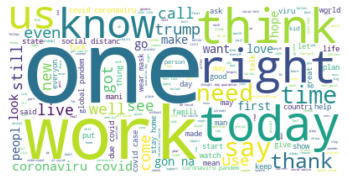

In [63]:
# create a wordcloud for the tweets
wc = WordCloud(background_color = 'white',
               stopwords = new_stop_words).generate(', '.join(tokens))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Additional Pre-processing Before Training Model

In [64]:
# convert column of lists to string
df['TweetCleaned'] = [','.join(map(str, l)) for l in df['TweetCleaned']]
df.head()

,Text,Date,search_term,TweetCleaned
0,"We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease (COVID-19), the 2020 APS March Meeting in Denver, CO, was canceled at the very last minute. – at Colorado Convention Center",03/01/2020,covid,"sad,learn,due,rapidli,escal,health,concern,relat,spread,coronaviru,diseas,covid,ap,march,meet,denver,co,cancel,last,minut,–,colorado,convent,center"
1,Best Coronavirus Outcome: -preppers overbuy shelf-stable foods relative to household storage capacity -prepper trolls are right and COVID does little actual damage -Trolls &amp; Preppers celebrate VV day with massive foodstuff drop-offs to food banks #WashYourHands,03/01/2020,covid,"best,coronaviru,outcom,prepper,overbuy,shelfstabl,food,rel,household,storag,capac,prepper,troll,right,covid,littl,actual,damag,troll,amp,prepper,celebr,vv,day,massiv,foodstuff,dropoff,food,bank,washyourhand"
2,*Spoiler alert* Trump contracts COVID-19 on his recent trip to India and becomes first orange American to die from virus.,03/01/2020,covid,"spoiler,alert,trump,contract,covid,recent,trip,india,becom,first,orang,american,die,viru"
3,We'd get real results from the WH in re COVID-19 if we had a real President instead of The Orange Seditionist.,03/01/2020,covid,"wed,get,real,result,wh,covid,real,presid,instead,orang,seditionist"
4,"Normally James and Ray, I’d laugh at such imagery given the Apocalypse Now reference, but I’m sure you’re recognizing this is the consequence of liberalism at its worst if COVID-19 hits the homeless of CA like that.",03/01/2020,covid,"normal,jame,ray,’,laugh,imageri,given,apocalyps,refer,’,sure,’,recogn,consequ,liber,worst,covid,hit,homeless,ca,like"


In [65]:
# find and remove the blank fields 
df[df['TweetCleaned'] == ''].index

Int64Index([   876,   4261,  10214,  15424,  17914,  28275,  28279,  28281,
             32054,  36698,  37830,  43558,  84598,  98554, 110922, 117154,
            122979, 124017, 199814, 201745, 202822, 203838, 207312, 208261,
            211230, 212468, 212891, 287262, 287264, 288712, 291185, 295349,
            296014],
           dtype='int64')

In [66]:
df = df.drop([876,   4261,  10214,  15424,  17914,  28275,  28279,  28281,
             32054,  36698,  37830,  43558,  84598,  98554, 110922, 117154,
            122979, 124017, 199814, 201745, 202822, 203838, 207312, 208261,
            211230, 212468, 212891, 287262, 287264, 288712, 291185, 295349,
            296014])

In [67]:
# convert TweetCleaned column back to list to obtain the length
df['TweetCleaned'] = df.TweetCleaned.apply(lambda x: x[1:-1].split(','))
df.head()

,Text,Date,search_term,TweetCleaned
0,"We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease (COVID-19), the 2020 APS March Meeting in Denver, CO, was canceled at the very last minute. – at Colorado Convention Center",03/01/2020,covid,"[ad, learn, due, rapidli, escal, health, concern, relat, spread, coronaviru, diseas, covid, ap, march, meet, denver, co, cancel, last, minut, –, colorado, convent, cente]"
1,Best Coronavirus Outcome: -preppers overbuy shelf-stable foods relative to household storage capacity -prepper trolls are right and COVID does little actual damage -Trolls &amp; Preppers celebrate VV day with massive foodstuff drop-offs to food banks #WashYourHands,03/01/2020,covid,"[est, coronaviru, outcom, prepper, overbuy, shelfstabl, food, rel, household, storag, capac, prepper, troll, right, covid, littl, actual, damag, troll, amp, prepper, celebr, vv, day, massiv, foodstuff, dropoff, food, bank, washyourhan]"
2,*Spoiler alert* Trump contracts COVID-19 on his recent trip to India and becomes first orange American to die from virus.,03/01/2020,covid,"[poiler, alert, trump, contract, covid, recent, trip, india, becom, first, orang, american, die, vir]"
3,We'd get real results from the WH in re COVID-19 if we had a real President instead of The Orange Seditionist.,03/01/2020,covid,"[ed, get, real, result, wh, covid, real, presid, instead, orang, seditionis]"
4,"Normally James and Ray, I’d laugh at such imagery given the Apocalypse Now reference, but I’m sure you’re recognizing this is the consequence of liberalism at its worst if COVID-19 hits the homeless of CA like that.",03/01/2020,covid,"[ormal, jame, ray, ’, laugh, imageri, given, apocalyps, refer, ’, sure, ’, recogn, consequ, liber, worst, covid, hit, homeless, ca, lik]"


In [68]:
# get the length of each tweet and add it as a new column 
df['tweet_len'] = df['TweetCleaned'].str.len()
len_tokens = df['tweet_len'].to_list()
df.head()

,Text,Date,search_term,TweetCleaned,tweet_len
0,"We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease (COVID-19), the 2020 APS March Meeting in Denver, CO, was canceled at the very last minute. – at Colorado Convention Center",03/01/2020,covid,"[ad, learn, due, rapidli, escal, health, concern, relat, spread, coronaviru, diseas, covid, ap, march, meet, denver, co, cancel, last, minut, –, colorado, convent, cente]",24
1,Best Coronavirus Outcome: -preppers overbuy shelf-stable foods relative to household storage capacity -prepper trolls are right and COVID does little actual damage -Trolls &amp; Preppers celebrate VV day with massive foodstuff drop-offs to food banks #WashYourHands,03/01/2020,covid,"[est, coronaviru, outcom, prepper, overbuy, shelfstabl, food, rel, household, storag, capac, prepper, troll, right, covid, littl, actual, damag, troll, amp, prepper, celebr, vv, day, massiv, foodstuff, dropoff, food, bank, washyourhan]",30
2,*Spoiler alert* Trump contracts COVID-19 on his recent trip to India and becomes first orange American to die from virus.,03/01/2020,covid,"[poiler, alert, trump, contract, covid, recent, trip, india, becom, first, orang, american, die, vir]",14
3,We'd get real results from the WH in re COVID-19 if we had a real President instead of The Orange Seditionist.,03/01/2020,covid,"[ed, get, real, result, wh, covid, real, presid, instead, orang, seditionis]",11
4,"Normally James and Ray, I’d laugh at such imagery given the Apocalypse Now reference, but I’m sure you’re recognizing this is the consequence of liberalism at its worst if COVID-19 hits the homeless of CA like that.",03/01/2020,covid,"[ormal, jame, ray, ’, laugh, imageri, given, apocalyps, refer, ’, sure, ’, recogn, consequ, liber, worst, covid, hit, homeless, ca, lik]",21


In [69]:
# convert the TweetCleaned column back to string from list
df['TweetCleaned'] = [','.join(map(str, l)) for l in df['TweetCleaned']]
df.head()

,Text,Date,search_term,TweetCleaned,tweet_len
0,"We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease (COVID-19), the 2020 APS March Meeting in Denver, CO, was canceled at the very last minute. – at Colorado Convention Center",03/01/2020,covid,"ad,learn,due,rapidli,escal,health,concern,relat,spread,coronaviru,diseas,covid,ap,march,meet,denver,co,cancel,last,minut,–,colorado,convent,cente",24
1,Best Coronavirus Outcome: -preppers overbuy shelf-stable foods relative to household storage capacity -prepper trolls are right and COVID does little actual damage -Trolls &amp; Preppers celebrate VV day with massive foodstuff drop-offs to food banks #WashYourHands,03/01/2020,covid,"est,coronaviru,outcom,prepper,overbuy,shelfstabl,food,rel,household,storag,capac,prepper,troll,right,covid,littl,actual,damag,troll,amp,prepper,celebr,vv,day,massiv,foodstuff,dropoff,food,bank,washyourhan",30
2,*Spoiler alert* Trump contracts COVID-19 on his recent trip to India and becomes first orange American to die from virus.,03/01/2020,covid,"poiler,alert,trump,contract,covid,recent,trip,india,becom,first,orang,american,die,vir",14
3,We'd get real results from the WH in re COVID-19 if we had a real President instead of The Orange Seditionist.,03/01/2020,covid,"ed,get,real,result,wh,covid,real,presid,instead,orang,seditionis",11
4,"Normally James and Ray, I’d laugh at such imagery given the Apocalypse Now reference, but I’m sure you’re recognizing this is the consequence of liberalism at its worst if COVID-19 hits the homeless of CA like that.",03/01/2020,covid,"ormal,jame,ray,’,laugh,imageri,given,apocalyps,refer,’,sure,’,recogn,consequ,liber,worst,covid,hit,homeless,ca,lik",21


In [70]:
# build the vectorizer
vect = TfidfVectorizer(max_features = 200, ngram_range=(1,2)).fit(df.TweetCleaned)

# create matrix from the vectorizer
V = vect.transform(df.TweetCleaned)

# create the transformed df
transformed_df = pd.DataFrame(V.toarray(), columns=vect.get_feature_names())

In [71]:
#combine the transformed dataframe along with the original to bring in the sentiment and n_words 
d = df.join(transformed_df)
d.head()

,Text,Date,search_term,TweetCleaned,tweet_len,alreadi,also,american,amp,anoth,around,ask,away,ay,back,believ,best,better,busi,call,care,case,caus,chang,china,citi,close,come,commun,continu,corona,coronaviru,could,countri,covi,covid,covid pandem,day,de,death,del,develop,die,distanc,done,dont,due,el,en,end,et,even,ever,everi,everyon,face,famili,feel,find,first,flu,follow,friend,fuck,get,give,global,go,gon,gon na,good,got,govern,great,hand,happen,health,help,home,hope,hospit,hous,im,infect,job,keep,kid,kill,know,la,last,let,life,like,live,lo,lockdow,lockdown,long,look,lot,love,lysol,made,make,mani,mask,may,mean,million,money,month,much,na,need,never,new,news,next,noth,number,one,open,order,ovid,pande,pandem,para,part,patient,peopl,person,place,plan,play,pleas,por,posit,post,presid,protect,protest,public,put,quaranti,quarantin,que,read,real,realli,report,respons,right,run,safe,said,say,school,se,see,shit,show,sinc,social,someon,someth,spread,start,state,stay,still,stop,support,sure,take,talk,tell,test,thank,thing,think,time,today,tri,trump,two,uarantin,us,use,vacci,vaccin,via,viru,wait,want,watch,way,wear,week,well,without,work,world,would,year
0,"We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease (COVID-19), the 2020 APS March Meeting in Denver, CO, was canceled at the very last minute. – at Colorado Convention Center",03/01/2020,covid,"ad,learn,due,rapidli,escal,health,concern,relat,spread,coronaviru,diseas,covid,ap,march,meet,denver,co,cancel,last,minut,–,colorado,convent,cente",24,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.347696,0.0,0.0,0.0,0.194106,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.455717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.442745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469069,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Best Coronavirus Outcome: -preppers overbuy shelf-stable foods relative to household storage capacity -prepper trolls are right and COVID does little actual damage -Trolls &amp; Preppers celebrate VV day with massive foodstuff drop-offs to food banks #WashYourHands,03/01/2020,covid,"est,coronaviru,outcom,prepper,overbuy,shelfstabl,food,rel,household,storag,capac,prepper,troll,right,covid,littl,actual,damag,troll,amp,prepper,celebr,vv,day,massiv,foodstuff,dropoff,food,bank,washyourhan",30,0.0,0.0,0.000000,0.471068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.441019,0.0,0.0,0.0,0.246205,0.0,0.467974,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.551344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,*Spoiler alert* Trump contracts COVID-19 on his recent trip to India and becomes first orange American to die from virus.,03/01/2020,covid,"poiler,alert,tr

## Run the Covid tweets in the previously trained model to predict sentiment 

In [72]:
d.shape

(332311, 205)

In [73]:
d = d.dropna()
d.shape

(332246, 205)

In [74]:
# remove the search_term as it will not be needed to run through the model
tweet_dataset = d.drop(['Date','search_term','TweetCleaned','Text'],axis=1)
tweet_dataset.head()

,tweet_len,alreadi,also,american,amp,anoth,around,ask,away,ay,back,believ,best,better,busi,call,care,case,caus,chang,china,citi,close,come,commun,continu,corona,coronaviru,could,countri,covi,covid,covid pandem,day,de,death,del,develop,die,distanc,done,dont,due,el,en,end,et,even,ever,everi,everyon,face,famili,feel,find,first,flu,follow,friend,fuck,get,give,global,go,gon,gon na,good,got,govern,great,hand,happen,health,help,home,hope,hospit,hous,im,infect,job,keep,kid,kill,know,la,last,let,life,like,live,lo,lockdow,lockdown,long,look,lot,love,lysol,made,make,mani,mask,may,mean,million,money,month,much,na,need,never,new,news,next,noth,number,one,open,order,ovid,pande,pandem,para,part,patient,peopl,person,place,plan,play,pleas,por,posit,post,presid,protect,protest,public,put,quaranti,quarantin,que,read,real,realli,report,respons,right,run,safe,said,say,school,se,see,shit,show,sinc,social,someon,someth,spread,start,state,stay,still,stop,support,sure,take,talk,tell,test,thank,thing,think,time,today,tri,trump,two,uarantin,us,use,vacci,vaccin,via,viru,wait,want,watch,way,wear,week,well,without,work,world,would,year
0,24,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.347696,0.0,0.0,0.0,0.194106,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.455717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.442745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469069,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,0.0,0.0,0.000000,0.471068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.441019,0.0,0.0,0.0,0.246205,0.0,0.467974,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.551344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14,0.0,0.0,0.528599,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.213929,0.0,0.000000,0.0,0.0,0.0,0.0,0.495427,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.485145,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.440458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.163983,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000

In [75]:
tweet_dataset.shape

(332246, 201)

In [76]:
# predict the covid tweet sentiments using our previously trained optimal model
tweet_pred = log_reg.predict(tweet_dataset)
tweet_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [77]:
d['Sentiment_Pred'] = tweet_pred
d.head()

,Text,Date,search_term,TweetCleaned,tweet_len,alreadi,also,american,amp,anoth,around,ask,away,ay,back,believ,best,better,busi,call,care,case,caus,chang,china,citi,close,come,commun,continu,corona,coronaviru,could,countri,covi,covid,covid pandem,day,de,death,del,develop,die,distanc,done,dont,due,el,en,end,et,even,ever,everi,everyon,face,famili,feel,find,first,flu,follow,friend,fuck,get,give,global,go,gon,gon na,good,got,govern,great,hand,happen,health,help,home,hope,hospit,hous,im,infect,job,keep,kid,kill,know,la,last,let,life,like,live,lo,lockdow,lockdown,long,look,lot,love,lysol,made,make,mani,mask,may,mean,million,money,month,much,na,need,never,new,news,next,noth,number,one,open,order,ovid,pande,pandem,para,part,patient,peopl,person,place,plan,play,pleas,por,posit,post,presid,protect,protest,public,put,quaranti,quarantin,que,read,real,realli,report,respons,right,run,safe,said,say,school,se,see,shit,show,sinc,social,someon,someth,spread,start,state,stay,still,stop,support,sure,take,talk,tell,test,thank,thing,think,time,today,tri,trump,two,uarantin,us,use,vacci,vaccin,via,viru,wait,want,watch,way,wear,week,well,without,work,world,would,year,Sentiment_Pred
0,"We were very sad to learn that due to rapidly escalating health concerns relating to the spread of the coronavirus disease (COVID-19), the 2020 APS March Meeting in Denver, CO, was canceled at the very last minute. – at Colorado Convention Center",03/01/2020,covid,"ad,learn,due,rapidli,escal,health,concern,relat,spread,coronaviru,diseas,covid,ap,march,meet,denver,co,cancel,last,minut,–,colorado,convent,cente",24,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.347696,0.0,0.0,0.0,0.194106,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.455717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.442745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469069,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Best Coronavirus Outcome: -preppers overbuy shelf-stable foods relative to household storage capacity -prepper trolls are right and COVID does little actual damage -Trolls &amp; Preppers celebrate VV day with massive foodstuff drop-offs to food banks #WashYourHands,03/01/2020,covid,"est,coronaviru,outcom,prepper,overbuy,shelfstabl,food,rel,household,storag,capac,prepper,troll,right,covid,littl,actual,damag,troll,amp,prepper,celebr,vv,day,massiv,foodstuff,dropoff,food,bank,washyourhan",30,0.0,0.0,0.000000,0.471068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.441019,0.0,0.0,0.0,0.246205,0.0,0.467974,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.551344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,*Spoiler alert* Trump contracts COVID-19 on his recent trip to India and becomes first orange American to die from virus.,03/01/2020,cov

In [78]:
dataframe = d[['Date','search_term','TweetCleaned','Sentiment_Pred']]
dataframe.head()

,Date,search_term,TweetCleaned,Sentiment_Pred
0,03/01/2020,covid,"ad,learn,due,rapidli,escal,health,concern,relat,spread,coronaviru,diseas,covid,ap,march,meet,denver,co,cancel,last,minut,–,colorado,convent,cente",0
1,03/01/2020,covid,"est,coronaviru,outcom,prepper,overbuy,shelfstabl,food,rel,household,storag,capac,prepper,troll,right,covid,littl,actual,damag,troll,amp,prepper,celebr,vv,day,massiv,foodstuff,dropoff,food,bank,washyourhan",0
2,03/01/2020,covid,"poiler,alert,trump,contract,covid,recent,trip,india,becom,first,orang,american,die,vir",1
3,03/01/2020,covid,"ed,get,real,result,wh,covid,real,presid,instead,orang,seditionis",1
4,03/01/2020,covid,"ormal,jame,ray,’,laugh,imageri,given,apocalyps,refer,’,sure,’,recogn,consequ,liber,worst,covid,hit,homeless,ca,lik",0


## Word Clouds of Pos and Neg COVID Tweets

In [79]:
# create df for negative sentiment tweets
neg = dataframe['Sentiment_Pred']==0
neg = dataframe[neg]
neg.head()

,Date,search_term,TweetCleaned,Sentiment_Pred
0,03/01/2020,covid,"ad,learn,due,rapidli,escal,health,concern,relat,spread,coronaviru,diseas,covid,ap,march,meet,denver,co,cancel,last,minut,–,colorado,convent,cente",0
1,03/01/2020,covid,"est,coronaviru,outcom,prepper,overbuy,shelfstabl,food,rel,household,storag,capac,prepper,troll,right,covid,littl,actual,damag,troll,amp,prepper,celebr,vv,day,massiv,foodstuff,dropoff,food,bank,washyourhan",0
4,03/01/2020,covid,"ormal,jame,ray,’,laugh,imageri,given,apocalyps,refer,’,sure,’,recogn,consequ,liber,worst,covid,hit,homeless,ca,lik",0
6,03/01/2020,covid,"hank,amostaghimi,demonstr,proactiv,guidanc,rather,reactiv,donoharm,covid,cancel,today,“,math,”,’,brainer,epidemiolog,standpoin",0
9,03/01/2020,covid,"ontagi,covid,compar,influenza,vir",0


In [80]:
dataframe.head()

,Date,search_term,TweetCleaned,Sentiment_Pred
0,03/01/2020,covid,"ad,learn,due,rapidli,escal,health,concern,relat,spread,coronaviru,diseas,covid,ap,march,meet,denver,co,cancel,last,minut,–,colorado,convent,cente",0
1,03/01/2020,covid,"est,coronaviru,outcom,prepper,overbuy,shelfstabl,food,rel,household,storag,capac,prepper,troll,right,covid,littl,actual,damag,troll,amp,prepper,celebr,vv,day,massiv,foodstuff,dropoff,food,bank,washyourhan",0
2,03/01/2020,covid,"poiler,alert,trump,contract,covid,recent,trip,india,becom,first,orang,american,die,vir",1
3,03/01/2020,covid,"ed,get,real,result,wh,covid,real,presid,instead,orang,seditionis",1
4,03/01/2020,covid,"ormal,jame,ray,’,laugh,imageri,given,apocalyps,refer,’,sure,’,recogn,consequ,liber,worst,covid,hit,homeless,ca,lik",0


In [81]:
# create df for positive sentiment tweets
pos = dataframe['Sentiment_Pred']==1
pos = dataframe[pos]
pos.shape

(200169, 4)

In [82]:
#create list of tokens for visualization - not executed yet
neg_tokens = neg['TweetCleaned'].tolist()
neg_tokens2 = ','.join(neg_tokens)

pos_tokens = pos['TweetCleaned'].tolist()
pos_tokens2 = ','.join(pos_tokens)
#pos_tokens = pos['TweetCleaned'].tolist()
#pos_tokens2 = [item for sublist in pos_tokens for item in sublist]

In [83]:
neg_tokens2[:100]

'ad,learn,due,rapidli,escal,health,concern,relat,spread,coronaviru,diseas,covid,ap,march,meet,denver,'

In [84]:
print(pos_tokens2[:100])

poiler,alert,trump,contract,covid,recent,trip,india,becom,first,orang,american,die,vir,ed,get,real,r


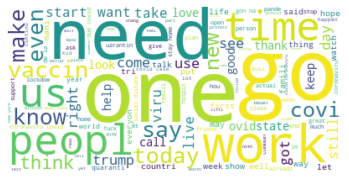

In [85]:
# create a wordcloud for the negative tweets
#words = neg_tokens # assign words for the word cloud
wc = WordCloud(background_color = 'white',
               stopwords=new_stop_words).generate(neg_tokens2)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

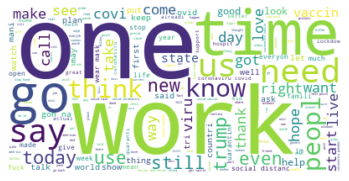

In [86]:
# create a wordcloud for the negative tweets
#words = neg_tokens # assign words for the word cloud
wc = WordCloud(background_color = 'white',
               stopwords=new_stop_words).generate(pos_tokens2)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Analysis

In [87]:
# test filtering to get sentiment of vaccine tweets on 3/1/2020
vaccine_March_01_sentiment = dataframe[(dataframe['Date']=='03/01/2020') & (dataframe['search_term']=='covid')]

In [88]:
vaccine_March_01_sentiment.shape

(269, 4)

In [89]:
vaccine_March_01_sentiment.head()

,Date,search_term,TweetCleaned,Sentiment_Pred
0,03/01/2020,covid,"ad,learn,due,rapidli,escal,health,concern,relat,spread,coronaviru,diseas,covid,ap,march,meet,denver,co,cancel,last,minut,–,colorado,convent,cente",0
1,03/01/2020,covid,"est,coronaviru,outcom,prepper,overbuy,shelfstabl,food,rel,household,storag,capac,prepper,troll,right,covid,littl,actual,damag,troll,amp,prepper,celebr,vv,day,massiv,foodstuff,dropoff,food,bank,washyourhan",0
2,03/01/2020,covid,"poiler,alert,trump,contract,covid,recent,trip,india,becom,first,orang,american,die,vir",1
3,03/01/2020,covid,"ed,get,real,result,wh,covid,real,presid,instead,orang,seditionis",1
4,03/01/2020,covid,"ormal,jame,ray,’,laugh,imageri,given,apocalyps,refer,’,sure,’,recogn,consequ,liber,worst,covid,hit,homeless,ca,lik",0


In [90]:
#sentiment score for vaccine tweets on 3/1/20
length = len(vaccine_March_01_sentiment)
sentiment_summed = vaccine_March_01_sentiment['Sentiment_Pred'].sum() 
print("The total num of tweets: ",length)
print("The sum of sentiments is: ", sentiment_summed)
avg_sentiment = sentiment_summed/length
print("The average sentiment is: ", avg_sentiment)

The total num of tweets:  269
The sum of sentiments is:  148
The average sentiment is:  0.550185873605948


In [91]:
#sentiment score for vaccine tweets on 6/1/20

vaccine_June_01_sentiment = dataframe[(dataframe['Date']=='06/01/2020') & (dataframe['search_term']=='covid')]

length = len(vaccine_June_01_sentiment)
sentiment_summed = vaccine_June_01_sentiment['Sentiment_Pred'].sum() 
print("The total num of tweets: ",length)
print("The sum of sentiments is: ", sentiment_summed)
avg_sentiment = sentiment_summed/length
print("The average sentiment is: ", avg_sentiment)

The total num of tweets:  500
The sum of sentiments is:  249
The average sentiment is:  0.498


In [92]:
# Create a dataframe focusing on the sum of sentiments by date and search term, ex. sum of 150 means that there were a total of 150 positive tweets
x = dataframe.groupby(['Date','search_term'])
x = x.sum().reset_index()



In [93]:
# create a dataframe focusing on the total number of tweets by date and search term, ex count of 200 means there were 200 total tweets of either sentiment
y = dataframe.groupby(['Date','search_term'])
y = y.count().reset_index()

In [94]:
# reformat the count dataframe
y['new_col'] = y['Sentiment_Pred']
y.drop(['Sentiment_Pred'], axis=1)

,Date,search_term,TweetCleaned,new_col
0,03/01/2020,covid,269,269
1,03/01/2020,covid-19,500,500
2,03/01/2020,lockdown,31,31
3,03/01/2020,lysol,14,14
4,03/01/2020,pandemic,250,250
...,...,...,...,...
791,06/28/2020,quarantine,500,500
792,06/28/2020,vaccine,371,371
793,06/29/2020,lockdown,382,382
794,06/29/2020,lysol,41,41


In [95]:
# merge the sentiment sum and tweet count dataframes
c = pd.merge(x,y, on=['Date', 'search_term'], how='outer')
c.head()

,Date,search_term,Sentiment_Pred_x,TweetCleaned,Sentiment_Pred_y,new_col
0,03/01/2020,covid,148,269,269,269
1,03/01/2020,covid-19,268,500,500,500
2,03/01/2020,lockdown,25,31,31,31
3,03/01/2020,lysol,12,14,14,14
4,03/01/2020,pandemic,138,250,250,250


In [96]:
# drop column not needed
c = c.drop(['new_col'], axis=1)

In [97]:
c.head()

,Date,search_term,Sentiment_Pred_x,TweetCleaned,Sentiment_Pred_y
0,03/01/2020,covid,148,269,269
1,03/01/2020,covid-19,268,500,500
2,03/01/2020,lockdown,25,31,31
3,03/01/2020,lysol,12,14,14
4,03/01/2020,pandemic,138,250,250


In [98]:
c['Sentiment_Score'] = c['Sentiment_Pred_x']/c['Sentiment_Pred_y']
c.head()

,Date,search_term,Sentiment_Pred_x,TweetCleaned,Sentiment_Pred_y,Sentiment_Score
0,03/01/2020,covid,148,269,269,0.550186
1,03/01/2020,covid-19,268,500,500,0.536000
2,03/01/2020,lockdown,25,31,31,0.806452
3,03/01/2020,lysol,12,14,14,0.857143
4,03/01/2020,pandemic,138,250,250,0.552000


In [99]:
# increase the size of the charts 
plt.rcParams['figure.figsize'] = [20, 10]

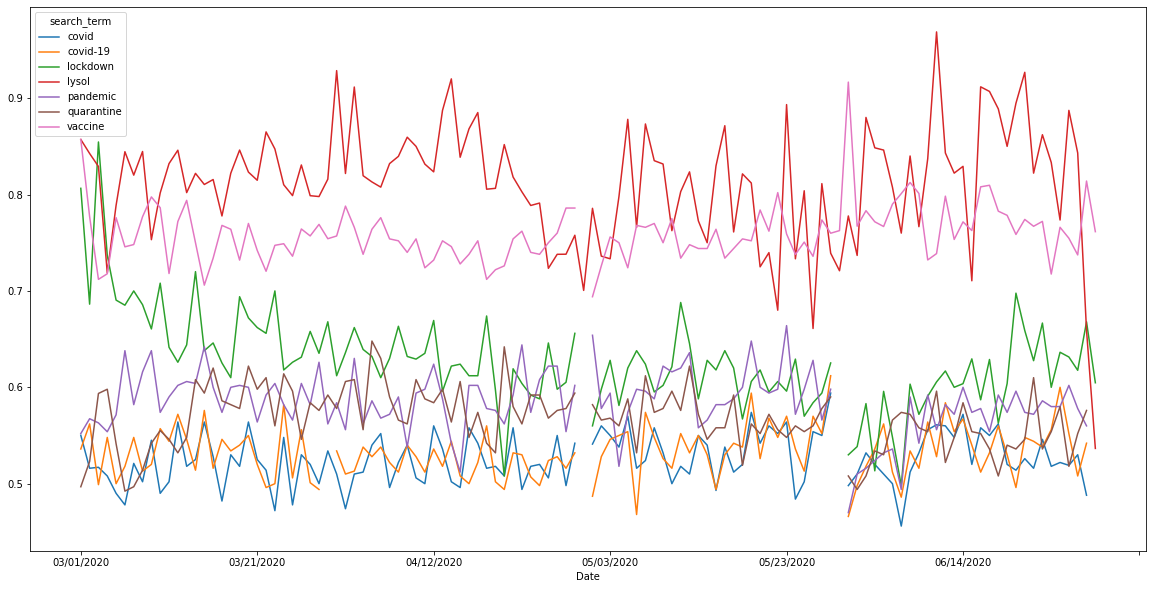

In [100]:
# plot the sentiment of our search terms over time
cc = c.pivot(index='Date', columns='search_term', values='Sentiment_Score')
cc.plot()

# the chart below shows the sentiment of all the search terms over time. There is consistency in the rankings of sentiment between the terms. 'Lysol' is associated with positive tweets and 'covid-19' is associated with more negative tweets.

In [102]:
# export to csv for further analysis
c.to_csv('data/output_for_zoho.csv', index=False)